In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Brief overview and potential insights into the data

In [2]:
#import source data
data_file = pd.read_excel('Data_Science_2022.xlsx', sheet_name="rawdata")

In [3]:
data_file.head()

,charge_time,country_code,customer_id,contract_id,customer_type,session_id,session_duration,power_usage,charging_phase
0,2020-01-01 02:51:15,CH,70b1cb95819ae6269ceb939a4ebd77ce,145f0ecdb0d7d03e3eeed935c40ec50a,PRIVATE,691a655714f9e1d109b593df9ed43b17,35.0,25.381,AC
1,2020-01-01 10:30:05,CH,580d8cf08402b9900c49b50f975cc625,c90bbf876bbfe1b6bb928b87d08ad890,PRIVATE,14b426dbc3de92b73b741b52f46d9d84,271.0,49.817,AC
2,2020-01-01 10:52:25,CH,0721193038205f8bda87e34795d1e061,b228bd0ec53ca1a20c7bbf453e6f84d9,BUSINESS,1a64707007b2b85b227d9a3646f47361,160.0,1.720,AC
3,2020-01-01 11:02:49,CH,ff654eaccb475061f833ecfa4f5a8ce7,0b968b544dbb830be2ac06648687a898,PRIVATE,310b11a07b3a57469537f4f78c902018,31.0,12.802,AC
4,2020-01-01 11:06:39,CH,7276dba2a167814c714e905ac7f14c34,e616454012ab204c1c6473d94baa2311,PRIVATE,a9037ebc508891a653219d19b310ef4f,33.0,1.763,AC


In [4]:
#extract data with Country ISO as CH (As per assumption 2)
data_ch = data_file[data_file['country_code'] == 'CH']
data_ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7367 entries, 0 to 7648
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   charge_time       7367 non-null   datetime64[ns]
 1   country_code      7367 non-null   object        
 2   customer_id       7367 non-null   object        
 3   contract_id       7367 non-null   object        
 4   customer_type     7367 non-null   object        
 5   session_id        7367 non-null   object        
 6   session_duration  7367 non-null   float64       
 7   power_usage       7367 non-null   float64       
 8   charging_phase    7367 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 575.5+ KB


In [5]:
#statistical summary of CH data
data_ch.describe()

,session_duration,power_usage
count,7367.000000,7367.000000
mean,121.870047,9.641399
std,443.695816,10.196125
min,0.000000,0.000000
25%,19.000000,1.984000
50%,46.000000,6.794000
75%,128.500000,13.568500
max,17452.000000,101.257000


In [6]:
# As mean and median doesnot coinside it is not normally distributed
data_ch['power_usage'].median()

6.794

In [7]:
# adding day category to table for understanding which day has most customer visit
data_ch['charge_day']=data_ch['charge_time'].dt.day_name()
data_ch.head()

,charge_time,country_code,customer_id,contract_id,customer_type,session_id,session_duration,power_usage,charging_phase,charge_day
0,2020-01-01 02:51:15,CH,70b1cb95819ae6269ceb939a4ebd77ce,145f0ecdb0d7d03e3eeed935c40ec50a,PRIVATE,691a655714f9e1d109b593df9ed43b17,35.0,25.381,AC,Wednesday
1,2020-01-01 10:30:05,CH,580d8cf08402b9900c49b50f975cc625,c90bbf876bbfe1b6bb928b87d08ad890,PRIVATE,14b426dbc3de92b73b741b52f46d9d84,271.0,49.817,AC,Wednesday
2,2020-01-01 10:52:25,CH,0721193038205f8bda87e34795d1e061,b228bd0ec53ca1a20c7bbf453e6f84d9,BUSINESS,1a64707007b2b85b227d9a3646f47361,160.0,1.720,AC,Wednesday
3,2020-01-01 11:02:49,CH,ff654eaccb475061f833ecfa4f5a8ce7,0b968b544dbb830be2ac06648687a898,PRIVATE,310b11a07b3a57469537f4f78c902018,31.0,12.802,AC,Wednesday
4,2020-01-01 11:06:39,CH,7276dba2a167814c714e905ac7f14c34,e616454012ab204c1c6473d94baa2311,PRIVATE,a9037ebc508891a653219d19b310ef4f,33.0,1.763,AC,Wednesday


#####  1. key Observation from above : minimum session time and power usage is 0, which can be data issue or customer have not received the recharge
##### 2.  standard deviation show there is large variance in the data. 
##### Lets sample the data with startification on charging_phase(HPC, AC, DC)

In [8]:
# AC startification
AC = data_ch[data_ch['charging_phase'] == 'AC' ] 
AC.describe(),AC['power_usage'].median()

(       session_duration  power_usage
 count       5658.000000  5658.000000
 mean         146.730258     7.929058
 std          501.225825     9.356700
 min            0.000000     0.000000
 25%           23.000000     1.392500
 50%           63.000000     5.000000
 75%          163.000000    10.293250
 max        17452.000000   101.257000,
 5.0)

In [9]:
# DC startification
DC =data_ch[data_ch['charging_phase'] == 'DC' ]
DC.describe(), DC['power_usage'].median()

(       session_duration  power_usage
 count       1550.000000  1550.000000
 mean          41.399892    15.315086
 std           94.283524    10.852263
 min            0.000000     0.000000
 25%           15.000000     7.707500
 50%           25.000000    13.599500
 75%           44.000000    21.721000
 max         1776.000000    82.659000,
 13.599499999999999)

In [10]:
# HPC startification
HPC =data_ch[data_ch['charging_phase'] == 'HPC' ]
HPC.describe(), HPC['power_usage'].median()

(       session_duration  power_usage
 count        159.000000   159.000000
 mean          21.679245    15.265367
 std           11.884636    10.242538
 min            0.000000     0.038000
 25%           13.000000     8.391000
 50%           20.000000    12.376000
 75%           28.500000    20.454000
 max           67.000000    60.014000,
 12.376)

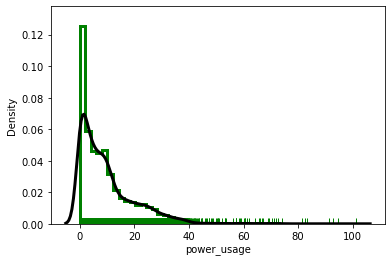

In [11]:
#overall distribution of power usage show it is left skewed. very minimal use post 40 KWh.
#higher power usage is under 10 KWh approx.
sns.distplot(data_ch['power_usage'],  rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"});


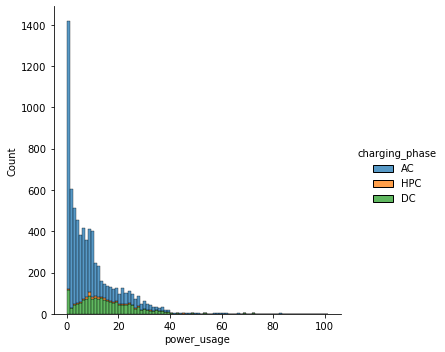

In [12]:
#AC power usage is more as compare to AC
sns.displot(data_ch, x="power_usage", hue="charging_phase", kde = False, multiple="stack")

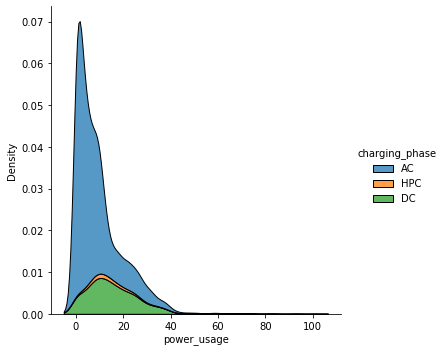

In [13]:
sns.displot(data_ch, x="power_usage", hue="charging_phase", kind="kde", multiple="stack")

In [14]:
#frequent customers
data_ch["customer_id"].value_counts().head(5)

f6e3c57839d8f5d1e52ed0b2c58105be    87
e5984218cfd32f9a6c602f45b965d2ef    78
02778864181102e24f3e4a6c808e7b7a    67
f3ada80d5c4ee70142b17b8192b2958e    65
b3d5c779237614a9cef5305b85a28273    64
Name: customer_id, dtype: int64

<AxesSubplot:ylabel='customer_id'>

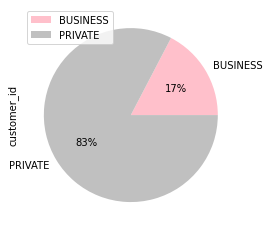

In [15]:
#83% qre private customer
data_ch["customer_type"].value_counts()/len(data_ch.session_id)*100
# Defining colors for the pie chart
colors = ['pink', 'silver'] 
# Plotting the pie chart for above dataframe
data_ch.groupby(['customer_type']).count().plot(
    kind='pie', y="customer_id", 
  autopct='%1.0f%%', colors=colors)

<AxesSubplot:ylabel='customer_id'>

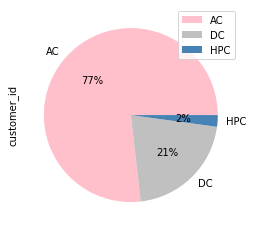

In [16]:
#77% are AC user and only 2% customers are HPC users
data_ch["charging_phase"].value_counts()/len(data_ch.session_id)*100
colors = ['pink', 'silver','steelblue'] 
# Plotting the pie chart for above dataframe
data_ch.groupby(['charging_phase']).count().plot(
    kind='pie', y="customer_id", 
  autopct='%1.0f%%', colors=colors)

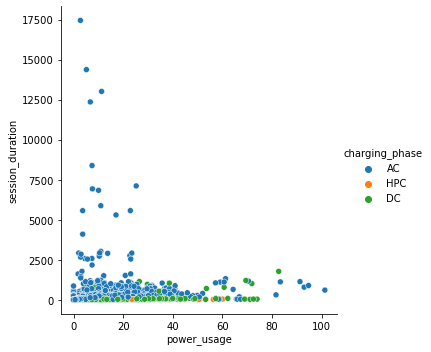

In [17]:
#session duration is more for AC, DC take medium session duration and HPC has lowest session duration.
sns.relplot(x="power_usage", y="session_duration", hue="charging_phase", data=data_ch,kind="scatter")

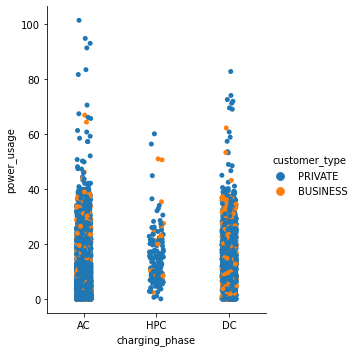

In [18]:
g = sns.catplot(x="charging_phase", y="power_usage", hue="customer_type",
                 data=data_ch,
                height=5, aspect=.8)

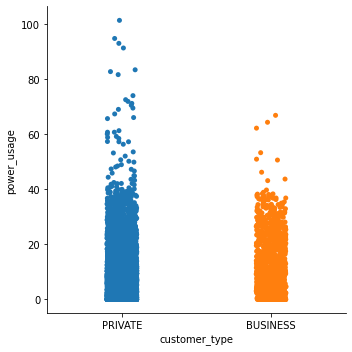

In [19]:
sns.catplot(x="customer_type", y="power_usage", data=data_ch);

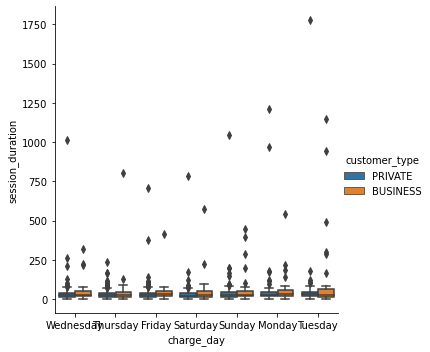

In [20]:
sns.catplot(x="charge_day", y="session_duration", kind="box", hue = "customer_type", data=DC);

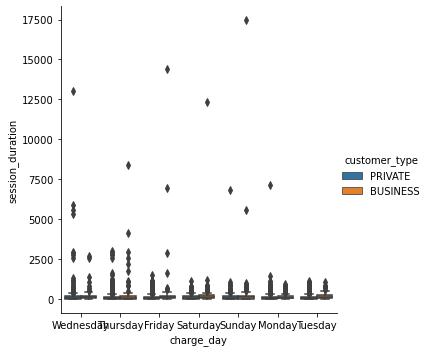

In [21]:
sns.catplot(x="charge_day", y="session_duration", kind="box", hue = "customer_type", data=AC);

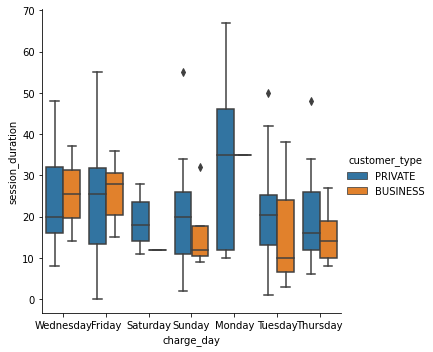

In [22]:
sns.catplot(x="charge_day", y="session_duration", kind="box", hue = "customer_type", data=HPC);

#### The charging phase may be assigned incorrectly which results in incorrect analysis. What percentage has been allocated correctly and what the correct assignment should be.

In [23]:
#Taking power level assumption into consideration. Below shows some incorrect tagging of charging_phase
DC_inc = data_ch[(data_ch['charging_phase'] == 'DC') & (data_ch['power_usage'] >50)]
DC_inc = DC_inc['session_id'].count()
AC_inc = data_ch[(data_ch['charging_phase'] == 'AC') & (data_ch['power_usage'] >22)]
AC_inc = AC_inc['session_id'].count()
HPC_inc = data_ch[(data_ch['charging_phase'] == 'HPC') & (data_ch['power_usage'] >350)]
HPC_inc = HPC_inc['session_id'].count()
DC_inc,AC_inc,HPC_inc

(14, 522, 0)

In [24]:
#count of CH data
overall_count =data_ch['session_id'].count()
overall_count

7367

In [25]:
#incorrect assignment in percentage (eg : count of DC having power usage greater than 50/overall )
Ip_DC = DC_inc/overall_count*100
Ip_AC = AC_inc/overall_count*100
Ip_HPC = HPC_inc/overall_count*100
Ip_DC,Ip_AC,Ip_HPC


(0.19003664992534275, 7.085652232930636, 0.0)

In [26]:
#Correct assignment in percentage
Cp_DC = 100 - Ip_DC
Cp_AC = 100 - Ip_AC
Cp_HPC = 100 - Ip_HPC
Cp_DC,Cp_AC,Cp_HPC

(99.80996335007465, 92.91434776706936, 100.0)

In [27]:
#unique customers
data_ch.customer_id.nunique()

1261

In [28]:
#top 5 customers who use charge station frequently
data_ch.groupby(['customer_id'])['power_usage'].agg('count').nlargest(5)


customer_id
f6e3c57839d8f5d1e52ed0b2c58105be    87
e5984218cfd32f9a6c602f45b965d2ef    78
02778864181102e24f3e4a6c808e7b7a    67
f3ada80d5c4ee70142b17b8192b2958e    65
b3d5c779237614a9cef5305b85a28273    64
Name: power_usage, dtype: int64

In [29]:
#top 5 customers who has maximum power_usage
data_ch.groupby(['customer_id'])['power_usage'].agg('sum').nlargest(5)

customer_id
ef482ef1710fbb4ddd2502353696689c    1261.702
f6e3c57839d8f5d1e52ed0b2c58105be    1097.761
b11d57a6dd02023e6acdd5174baae917    1079.058
2ffe5ae29bb6b60145835654b541b443     980.104
f3ada80d5c4ee70142b17b8192b2958e     842.843
Name: power_usage, dtype: float64

In [30]:
#behavior of priority 1 customer
prime_cust =data_ch[data_ch['customer_id'] == 'f6e3c57839d8f5d1e52ed0b2c58105be']
prime_cust

,charge_time,country_code,customer_id,contract_id,customer_type,session_id,session_duration,power_usage,charging_phase,charge_day
268,2020-01-05 07:42:45,CH,f6e3c57839d8f5d1e52ed0b2c58105be,ee1342237e0754d78e6500d03ae0573a,BUSINESS,0274dc29c890fbb788228d1f54796538,7.0,2.000,DC,Sunday
284,2020-01-05 10:16:29,CH,f6e3c57839d8f5d1e52ed0b2c58105be,ee1342237e0754d78e6500d03ae0573a,BUSINESS,4b6636a7aad7b6167f5f3c9b68e4240a,40.0,4.604,AC,Sunday
291,2020-01-05 11:28:17,CH,f6e3c57839d8f5d1e52ed0b2c58105be,ee1342237e0754d78e6500d03ae0573a,BUSINESS,0ee22357278c75b535e0510e15c48082,23.0,14.603,AC,Sunday
334,2020-01-05 16:36:35,CH,f6e3c57839d8f5d1e52ed0b2c58105be,ee1342237e0754d78e6500d03ae0573a,BUSINESS,ed35f65abedcba201a35144d3637b41e,19.0,13.700,DC,Sunday
537,2020-01-08 10:53:18,CH,f6e3c57839d8f5d1e52ed0b2c58105be,0ef26ad915c845bd8e3bf935de682724,BUSINESS,b4aa0d6e2a765cb9e04eb5fdb274ee4c,26.0,10.079,AC,Wednesday
...,...,...,...,...,...,...,...,...,...,...
7030,2020-03-31 15:13:24,CH,f6e3c57839d8f5d1e52ed0b2c58105be,12c492c61625cf414cad5b5465a23a24,BUSINESS,0175c7e3fc573ea2279e1d378043da10,30.0,5.306,DC,Tuesday
7328,2020-04-03 14:11:33,CH,f6e3c57839d8f5d1e52ed0b2c58105be,263e196177909953bc37af7f1f864d8b,BUSINESS,92e9b7b77a853965581ef8764dbf9086,31.0,23.011,HPC,Friday
7410,2020-04-04 11:21:40,CH,f6e3c57839d8f5d1e52ed0b2c58105be,263e196177909953bc37af7f1f864d8b,BUSINESS,988cc4d4d3689f5573fe1d0d227871b3,149.0,17.474,AC,Saturday
7426,2020-04-04 14:36:28,CH,f6e3c57839d8f5d1e52ed0b2c58105be,1cf980b9a61889f26d08d66c6c1aa36f,BUSINESS,cf24a29b23b84429d5040b19bd7679a2,20.0,14.514,DC,Saturday


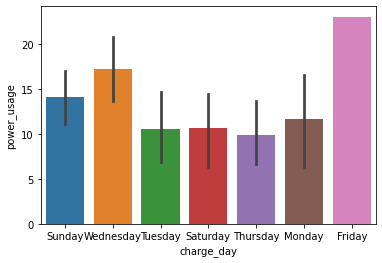

In [31]:
#fridays has been observed as most power usage day of top customer
sns.barplot(x="charge_day", y="power_usage", data=prime_cust);

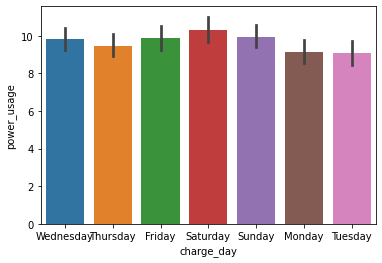

In [32]:
#Lets see which is most overall power usage day
#There has been no specifuc insights driven from below
sns.barplot(x="charge_day", y="power_usage", data=data_ch);

In [33]:
#detecting duplicate session ID
data_ch[data_ch['session_id'].duplicated()]

,charge_time,country_code,customer_id,contract_id,customer_type,session_id,session_duration,power_usage,charging_phase,charge_day
2016,2020-01-30 13:39:34,CH,58aceba2461bd8a8b7d215bf9e46b2ce,94a28dfb9520a35154a732fc94abfbff,PRIVATE,1db02e8c22ab823a0d3440634675bc65,6.0,2.786,HPC,Thursday


In [34]:
#small anamoly observed in the data. There is one duplicate session id having different power_usage with same charge_time,same customer
data_ch[data_ch['session_id'] == '1db02e8c22ab823a0d3440634675bc65']

,charge_time,country_code,customer_id,contract_id,customer_type,session_id,session_duration,power_usage,charging_phase,charge_day
2015,2020-01-30 13:39:34,CH,58aceba2461bd8a8b7d215bf9e46b2ce,94a28dfb9520a35154a732fc94abfbff,PRIVATE,1db02e8c22ab823a0d3440634675bc65,6.0,0.602333,HPC,Thursday
2016,2020-01-30 13:39:34,CH,58aceba2461bd8a8b7d215bf9e46b2ce,94a28dfb9520a35154a732fc94abfbff,PRIVATE,1db02e8c22ab823a0d3440634675bc65,6.0,2.786000,HPC,Thursday


In [35]:
#Obeserved issue with the data below. Session time is not captured for below session ids
data_ch[data_ch['session_duration'] == 0 ]

,charge_time,country_code,customer_id,contract_id,customer_type,session_id,session_duration,power_usage,charging_phase,charge_day
2276,2020-02-03 17:26:04,CH,9ea171d29cf47e186d083c06be4e2ca2,8cbcca88f9fbbe5edc41356b2a908225,PRIVATE,dced651bfe94077d95b2d542473e5a8e,0.0,0.000,DC,Monday
3612,2020-02-21 09:35:19,CH,34b9df8d0ab73f851c2950554db628f7,ff9fbdb0ab92fb875ce8f64f079543c4,PRIVATE,44b914c2b9fc817f2942b12bdf884b90,0.0,7.145,HPC,Friday
3922,2020-02-25 12:39:23,CH,7f64ababa0a18b7a549de081ebfb7084,2cb0f7c08bfd837b0392d0f13f7c9c9e,PRIVATE,fcef0f11d7f034965f2c0e37ce301b54,0.0,1.766,AC,Tuesday
3923,2020-02-25 12:39:26,CH,7f64ababa0a18b7a549de081ebfb7084,2cb0f7c08bfd837b0392d0f13f7c9c9e,PRIVATE,0117058bb9db8645ac25c074ca9205a9,0.0,5.650,AC,Tuesday
3924,2020-02-25 12:39:31,CH,7f64ababa0a18b7a549de081ebfb7084,2cb0f7c08bfd837b0392d0f13f7c9c9e,PRIVATE,b9815474629d2c6f0b84b2e2008f6f40,0.0,4.727,AC,Tuesday
3925,2020-02-25 12:39:38,CH,7f64ababa0a18b7a549de081ebfb7084,2cb0f7c08bfd837b0392d0f13f7c9c9e,PRIVATE,894016394b423fafa8ea0cb3cdbb4632,0.0,5.501,AC,Tuesday
5548,2020-03-15 18:33:15,CH,5403243e765562bb3726b3acbbac15d1,8a361c84f1f9688fc47d246ae7d21372,PRIVATE,a415c85c2d6e30b4736d22c4ba61af66,0.0,0.000,AC,Sunday
5552,2020-03-15 18:46:50,CH,5403243e765562bb3726b3acbbac15d1,8a361c84f1f9688fc47d246ae7d21372,PRIVATE,33e0365b6f10759fb8ac9b792c4bc788,0.0,0.000,AC,Sunday
7063,2020-04-01 02:48:32,CH,5403243e765562bb3726b3acbbac15d1,8a361c84f1f9688fc47d246ae7d21372,PRIVATE,9e7903ac18433c4354d6f463ce450041,0.0,25.817,AC,Wednesday


In [36]:
# In below data either the power_usage is not captured or customer for parked but could not charge
data_ch[data_ch['power_usage'] == 0 ]

,charge_time,country_code,customer_id,contract_id,customer_type,session_id,session_duration,power_usage,charging_phase,charge_day
14,2020-01-01 13:27:35,CH,2026dd4c3e6bbc6de46a98432db3a929,11f3db4f0fe6f1951d1dcf62d19cdcc1,PRIVATE,277712807ec5e89b175f034d136430b2,8.0,0.0,AC,Wednesday
46,2020-01-01 19:12:03,CH,fe2eb2f0560c8352918c5f805455a602,37f47bf0434530aa11f960b300cfba13,PRIVATE,1e6104b2c718aabe55737041049a2c1f,2.0,0.0,AC,Wednesday
48,2020-01-01 19:19:38,CH,e55da6d27e8671d31f63266b9508d749,e05f518d51c3565179ebec1de2f44b68,PRIVATE,e68d2fe142842c6de5b979460dbf7dc5,1.0,0.0,DC,Wednesday
53,2020-01-02 02:49:09,CH,fe2eb2f0560c8352918c5f805455a602,37f47bf0434530aa11f960b300cfba13,PRIVATE,886c06464b74553ffa47bb9b597371dd,1.0,0.0,DC,Thursday
54,2020-01-02 02:50:19,CH,fe2eb2f0560c8352918c5f805455a602,37f47bf0434530aa11f960b300cfba13,PRIVATE,c85a1fae4337cf7c2164fd123a41fed5,1.0,0.0,DC,Thursday
...,...,...,...,...,...,...,...,...,...,...
7594,2020-04-06 13:58:37,CH,f3ada80d5c4ee70142b17b8192b2958e,27cfbc0016590311a78c952a414f2dc5,PRIVATE,b8d4e2aa402683735c064405c11062e4,1.0,0.0,AC,Monday
7604,2020-04-06 15:06:24,CH,c4979b4ce3cbd8a8a595a28e292ff73a,40aaa3db49dcc5e87c0e7c44b3077aff,PRIVATE,888217f8427b2c0c4c1095bb5ac548b8,35.0,0.0,AC,Monday
7632,2020-04-06 18:39:53,CH,407c334809565d941338efc9e3a9f687,8f55afb574fe5ce0b584552638cd3287,PRIVATE,e23053cfd3328ddd6effab2ff3c6b179,865.0,0.0,AC,Monday
7641,2020-04-06 21:45:26,CH,3be780be39e998dd0c9d437b9b3a567d,11a1ac3ce9814860cbfc26ee03e73e8c,PRIVATE,4d23a633ac635bc126552229a7066ecd,2.0,0.0,AC,Monday


#### Because the session duration can contain both the charging time and the parking time of a vehicle, can you identify approximately which chargiung sessions have long parking times. Explain your thought process

In [37]:
#session duration = charging_time + parking_time
#There are multiple factor considered to calculate charging time. There is no proper category mentioned for charging and parking time
# As per my knowledge, factors affecting the charging speed ------
#reference = https://www.inchcalculator.com/electric-vehicle-charging-time-calculator/
#1) battery capacity (KW)
#2) session time (mins)
#3)Max charging rate of vehicle
#4)environmental factors
#5)capacity of charging station(level of charging in volts , level 1, level 2)
#6)no of outlets to the charger

#charging_time = battery_capacity/charging_speed*0.9
#note : 0.9 is which is the average power efficiency.


In [38]:
#As we donot have enough paramater to estimate the charing and parking time, the solution for this to detect the outlier in session time.
# Charging time varies with respect to charging phase. AC requires more charging time compare to DC and HPC.
# Hence, detecting extreme session duration for each charging type.
def long_park(duration):
    Q1 = duration.quantile(0.25)
    Q3 = duration.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 +(1.5 * IQR)
    return upper_bound

In [39]:
AC_park = long_park(AC.session_duration)
DC_park = long_park(DC.session_duration)
HPC_park = long_park(HPC.session_duration)
AC_park,DC_park,HPC_park

(373.0, 87.5, 51.75)

In [40]:
AC[AC['session_duration'] > 373.0],AC[AC['session_duration'] > 373.0].count()

(             charge_time country_code                       customer_id  \
 28   2020-01-01 15:02:27           CH  63d4e77fd8a80ee81cb5de8e34d7151f   
 32   2020-01-01 15:55:18           CH  9f33478ce4c75d66df06c4f746d7827c   
 44   2020-01-01 18:04:55           CH  b73bade959e6beceb6678acbbbb5be57   
 47   2020-01-01 19:13:12           CH  fe2eb2f0560c8352918c5f805455a602   
 95   2020-01-02 14:42:59           CH  e348e4d768ee19c1d0c68ce3a66d6303   
 ...                  ...          ...                               ...   
 7549 2020-04-06 06:56:28           CH  d70836bc38ac932002379f9520300d7c   
 7558 2020-04-06 08:39:31           CH  4930377a4ade3b1e7b9e19d1ae9f87dc   
 7621 2020-04-06 17:55:06           CH  0b1ec7225cc65947854e79e7a58c63bc   
 7627 2020-04-06 18:17:43           CH  fcdf80dc62e184f1a306c980eb26c191   
 7632 2020-04-06 18:39:53           CH  407c334809565d941338efc9e3a9f687   
 
                            contract_id customer_type  \
 28    28624473d5ec718ada0636

In [41]:
DC[DC['session_duration'] > 87.5],DC[DC['session_duration'] > 87.5].count()

(             charge_time country_code                       customer_id  \
 49   2020-01-01 19:22:43           CH  e55da6d27e8671d31f63266b9508d749   
 153  2020-01-03 13:53:16           CH  89cc93edb310fe26b81e6e56003f33ff   
 330  2020-01-05 16:24:45           CH  10c2b66d97dde3e04da35a6042edddd6   
 601  2020-01-09 08:06:49           CH  ae10bb7c542bfe65d145621c514cf77c   
 743  2020-01-10 16:51:19           CH  10c2b66d97dde3e04da35a6042edddd6   
 ...                  ...          ...                               ...   
 6838 2020-03-29 12:23:30           CH  02778864181102e24f3e4a6c808e7b7a   
 6866 2020-03-29 16:13:06           CH  ef482ef1710fbb4ddd2502353696689c   
 7205 2020-04-02 13:08:12           CH  604b5d386ba726e7e2233a1619364eef   
 7527 2020-04-05 15:58:54           CH  e0abd6e6385c00b0960a292aa8522351   
 7559 2020-04-06 08:55:45           CH  02778864181102e24f3e4a6c808e7b7a   
 
                            contract_id customer_type  \
 49    e05f518d51c3565179ebec

In [42]:
HPC[HPC['session_duration'] > 51],HPC[HPC['session_duration'] > 51].count()

(             charge_time country_code                       customer_id  \
 1185 2020-01-17 13:46:55           CH  5d2c27ae7617d2660bbdc0f22d141ab8   
 2706 2020-02-09 14:29:43           CH  9b9055e152c018af7749e658904a0e35   
 4431 2020-03-02 17:00:11           CH  de707582b4659b64e43a26894bc2dd33   
 
                            contract_id customer_type  \
 1185  9cb411ce06bca5de4165990f0da5158d       PRIVATE   
 2706  f8015996ae8d5cfddd2ee74f6697feb6       PRIVATE   
 4431  3ccbea770fd7a3c0ed6bff1204117274       PRIVATE   
 
                             session_id  session_duration  power_usage  \
 1185  8cd9f7db7bdb92524f374964a87465b1              55.0       17.424   
 2706  c7a32f2f5b1d04494d28f41b4f764627              55.0       33.973   
 4431  154623a81fd2b07e784e854bd54b14dd              67.0       32.058   
 
      charging_phase charge_day  
 1185            HPC     Friday  
 2706            HPC     Sunday  
 4431            HPC     Monday  ,
 charge_time         3
 count

#### 4. Can you identify issues in the data that could result in an improvement of the product we offer to customers. How would you present the problem and the potential solution

#### 5. Is there any additional data you would add to this raw data to give additional insights